# Matrix Multiplication

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
## Rules for multiplication validity

m = 4
n = 3
k = 6

#make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

#test whitch multiplications are valid.
#think of your answer first, then test

np.matmul(A,B) #(4,3)x(3x6) = (4x6)
#np.matmul(A,A) #don't
np.matmul(A.T, C) #(3x4)x(4x6) = (3x6)
np.matmul(np.matrix.transpose(B),B) #(6x3)x(3x6) = (6x6)

array([[ 1.0542921 , -0.25421699,  0.26050259, -1.14155278,  0.44726667,
         1.61129737],
       [-0.25421699,  1.74995029, -1.03756223, -0.41156276,  1.96793415,
        -1.02238573],
       [ 0.26050259, -1.03756223,  0.64113198,  0.33585872, -1.12521587,
         0.71256264],
       [-1.14155278, -0.41156276,  0.33585872,  4.99228764, -1.91756046,
        -2.29467342],
       [ 0.44726667,  1.96793415, -1.12521587, -1.91756046,  2.84118609,
         0.04123959],
       [ 1.61129737, -1.02238573,  0.71256264, -2.29467342,  0.04123959,
         2.8881983 ]])

## Challenge

In [24]:
# implement matrix multiplication via layers
m = 4
n = 3

#generate 2 matrices (A,B)
A = np.random.randn(m,n)
B = np.random.randn(n,m)
#build the product matrix layer-wise (for-loop)
C1 = np.zeros((m,m))
              
for i in range(n):
    C1 += np.outer(A[:,i], B[i,:])

print(C1)
#implement the matrix multiplication directly
C2 = np.matmul(A,B)

#compare the results

if np.allclose(C1, C2):
    print("\nAs matrizes C1 e C2 são iguais dentro de uma margem numérica.")
else:
    print("\nAs matrizes C1 e C2 são diferentes.")
    print("Diferença:")
    print(C1 - C2)

for i in range(C1.shape[0]):  # Itera sobre as linhas
    for j in range(C1.shape[1]):  # Itera sobre as colunas
        if C1[i, j] == C2[i, j]:
            print(f"Elementos iguais em posição ({i}, {j}): {C1[i, j]}")
        else:
            print(f"Elementos diferentes em posição ({i}, {j}): C1={C1[i, j]}, C2={C2[i, j]}")
    
#print(direct)


[[ 0.03455602 -2.18333597 -1.17172298 -0.21443794]
 [-0.36450753  0.1483093  -0.10953727  0.12297168]
 [-0.03568563  0.00508205  0.79425716 -0.35479318]
 [ 4.97241187  1.21059511  0.37863002 -0.07526871]]

As matrizes C1 e C2 são iguais dentro de uma margem numérica.
Elementos iguais em posição (0, 0): 0.03455601841881217
Elementos iguais em posição (0, 1): -2.183335967084571
Elementos iguais em posição (0, 2): -1.1717229819173132
Elementos iguais em posição (0, 3): -0.21443794281894873
Elementos iguais em posição (1, 0): -0.36450752953679305
Elementos iguais em posição (1, 1): 0.1483092954853294
Elementos iguais em posição (1, 2): -0.10953726548546439
Elementos iguais em posição (1, 3): 0.12297167554792345
Elementos iguais em posição (2, 0): -0.03568562788648241
Elementos iguais em posição (2, 1): 0.005082047586446203
Elementos iguais em posição (2, 2): 0.7942571595183601
Elementos iguais em posição (2, 3): -0.35479318445065927
Elementos iguais em posição (3, 0): 4.97241186747486
Elem

## Order Operation

$$ (LIVE)^T = E^TV^TI^TL^T$$

In [32]:
n = 2
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

#result of forward multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )
print(res1)
print(" ")
#result of flipped multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T
print(res2) 

#test equality by subtracting (ignore possible computer rounding errors)
res1-res2

[[ 6.65710732  7.85574662]
 [-2.5035678  -2.77318793]]
 
[[ 6.65710732  7.85574662]
 [-2.5035678  -2.77318793]]


array([[8.8817842e-16, 8.8817842e-16],
       [4.4408921e-16, 4.4408921e-16]])

## Matrix Vector Multiplication

In [44]:
m = 4

#create matrices
N = np.random.randint(-10,11,(m,m))
print(N)
print(" ")
S = np.round(N.T*N /m**2) #scaled symmetric
print(S)
print(" ")

#and vector
w = np.array([-1, 0, 1, 2])
print(w)
print(" ")

#with symmetric matrix
print(f"1-{S@w}")
print(" ")
print(f"2-{S.T@w}")
print(" ")
print(f"3-{w@S}")
print(" ")
print(f"4-{w.T@S.T}")
print(" ")
print(f"5-{w.T@S}")
print(" ")

[[ 7 -2 -9  6]
 [ 2  2  3 10]
 [-9  6 -1  8]
 [-2 10  8  4]]
 
[[ 3. -0.  5. -1.]
 [-0.  0.  1.  6.]
 [ 5.  1.  0.  4.]
 [-1.  6.  4.  1.]]
 
[-1  0  1  2]
 
1-[ 0. 13.  3.  7.]
 
2-[ 0. 13.  3.  7.]
 
3-[ 0. 13.  3.  7.]
 
4-[ 0. 13.  3.  7.]
 
5-[ 0. 13.  3.  7.]
 


## 2D Transformation matrices

[[ 1 -1]
 [ 2  1]]
 
[-5 -4]
 


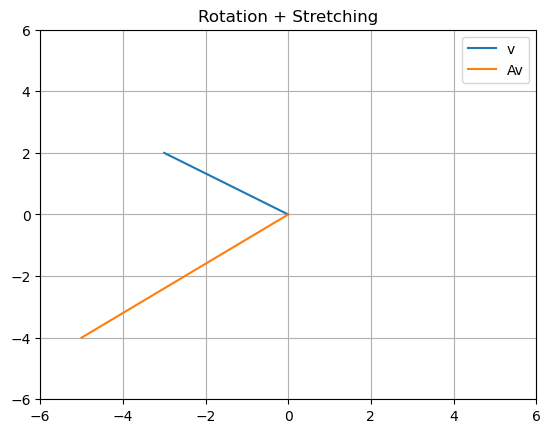

In [50]:
#2D input vector
v = np.array([-3, 2])

#2x2 transformation matrix
A = np.array([[1,-1], [2,1]])
print(A)
print(" ")

#outputvector is Av (convert v to column)
w = A@(np.matrix.transpose(v))
print(w)
print(" ")

#plot them
plt.plot([0, v[0]], [0,v[1]], label='v')
plt.plot([0, w[0]], [0,w[1]], label='Av')

plt.grid()
plt.axis((-6,6,-6,6)) #-x,+x, -y,+y
plt.legend()
plt.title('Rotation + Stretching')
plt.show()

th: 0.06283185307179587
A: [[ 0.99802673 -0.06279052]
 [ 0.06279052  0.99802673]]
 
[ 3.11966122 -1.8076819 ]
 


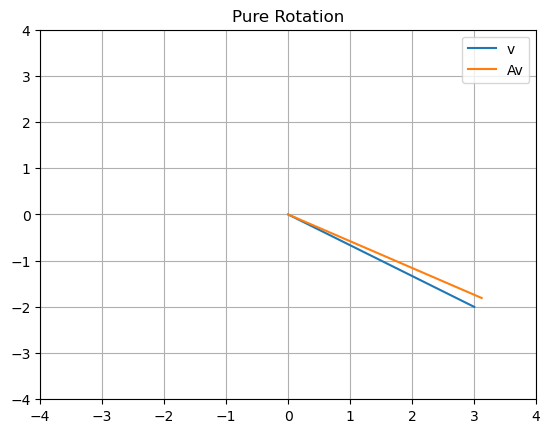

In [59]:
## pure rotetion

#2D input vector
v = np.array([3, -2])
th = np.pi/50
print(f'th: {th}')
A = np.array([[math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
print(f'A: {A}')
print(" ")

#outputvector is Av (convert v to column)
w = A@(np.matrix.transpose(v))
print(w)
print(" ")

#plot them
plt.plot([0, v[0]], [0,v[1]], label='v')
plt.plot([0, w[0]], [0,w[1]], label='Av')

plt.grid()
plt.axis((-4,4,-4,4)) #-x,+x, -y,+y
plt.legend()
plt.title('Pure Rotation')
plt.show()

## Challenge

thetas: [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 

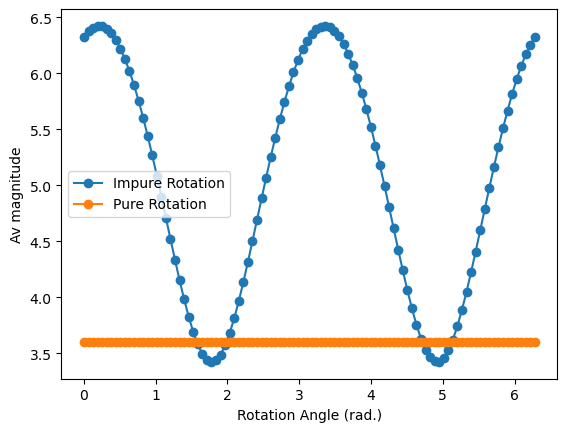

In [68]:
thetas = np.linspace(0,2*np.pi, 100)
print(f'thetas: {thetas}')
print(" ")

vecmags = np.zeros((len(thetas),2))
#print(f'vecmags: {vecmags}')
print()

for i in range(len(thetas)):
    th = thetas[i]
    A1 = np.array([[2*math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
    A2 = np.array([[math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])

    #cmopute vector magnitures
    vecmags[i,0] = np.linalg.norm(A1@v.T)
    vecmags[i,1] = np.linalg.norm(A2@v.T)

plt.plot(thetas, vecmags, 'o-') 
plt.xlabel("Rotation Angle (rad.)")
plt.ylabel("Av magnitude")
plt.legend(['Impure Rotation', 'Pure Rotation'])
plt.show()

## Challenge 2

 
(100, 2)
 
 
[[1 2]
 [2 1]]
 
 


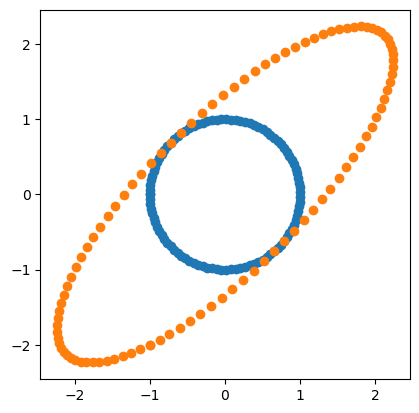

In [83]:
# generate (X,y) coordinates for a circle
x = np.linspace(-np.pi, np.pi, 100) #min, max e quantity
#print(x)
print(" ")

xy = np.vstack((np.cos(x), np.sin(x))).T
#print(xy)
print(np.shape(xy))
print(" ")

#plot the circle
plt.plot(xy[:,0], xy[:,1], 'o')
print(" ")

#create a 2x2 matrix, starting with I
T = np.array([[1,2], [2,1]])
print(T)
print(" ")

#multiply matrix by coordinates
newxy = xy@T

#plot the new coords. 
plt.plot(newxy[:,0], newxy[:,1], 'o')
print(" ")
plt.axis('square')
plt.show()
#try with various matrices

#try with a singular matrix (columns form a linearly dependent set)

## Additive and multiplicative matrix identities

## $$AI = IA = A || A+I \neq A$$
## $$A0 = 0A \neq A || A+0 = A$$

In [90]:
#size of matrices 
n = 4

#create matrices
A = np.round(10*np.random.randn( n,n))
print(A)
print(" ")
I = np.eye(n,n)
Z = np.zeros((n,n))

#testing both identities
np.array_equal(A@I, A)
np.array_equal(A, A@I)
np.array_equal(A, A+I)
np.array_equal(A+Z, A@I)

[[  3.  -9.   2.   5.]
 [-16. -17. -22.  -1.]
 [ 17.  -2.   7.  -4.]
 [  6.  -7.  11. -13.]]
 


True

## Additive and multiplicative symmetric matrices

In [94]:
##the additive method

#specify sizes
m = 5
n = 5

A = np.round(5*np.random.randn(m,n))
print(A)
print(" ")
S = (A+A.T)/2
print(S)
print(" ")

#A symmetric matrix minus its transpose should be all zeros
print(S-S.T)

[[ -3.  -4.  -3. -12.  -2.]
 [ -1.   1.   3.   4.  -1.]
 [ -1.   0.   2. -10.   5.]
 [ -2.  -3.   4.  -2.  -4.]
 [  7.   1.  -4.   1.   3.]]
 
[[-3.  -2.5 -2.  -7.   2.5]
 [-2.5  1.   1.5  0.5  0. ]
 [-2.   1.5  2.  -3.   0.5]
 [-7.   0.5 -3.  -2.  -1.5]
 [ 2.5  0.   0.5 -1.5  3. ]]
 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [99]:
## the multiplicative method

#specify sizes
m = 5
n = 3

# create matrices
A = np.round(5*np.random.randn(m,n))
AtA = A.T@A
AAt = A@A.T

#first show that they are squares
print(f'Shape pf AtA: {AtA.shape}')
print(f'Shape pf AAt: {AAt.shape}')

#show that they are symmetric
print(AtA-AtA.T), print(" ")

print(AAt-AAt.T)

Shape pf AtA: (3, 3)
Shape pf AAt: (5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
